# Project: Supervised Learning (Logistic Regression, k-NN and Naïve Bayes models)
# By: Krishna Kant Kaushal
# Python version used: Python 3.7.3

🥏Data Description:

    The file Bank.xls contains data on 5000 customers. The data include customer demographic information 
    (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), 
    and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers,
    only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

🥏Domain:

    Banking

🥏Context:

    This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability
    customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran
    last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged
    the retail marketing department to devise campaigns with better target marketing to increase the success
    ratio with minimal budget.

🥏Attribute Information:
    1. ID : Customer ID
    2. Age : Customer's age in completed years
    3. Experience : No. years of professional experience
    4. Income : Annual income of the customer ($000)
    5. ZIP Code : Home Address ZIP code.
    6. Family : Family size of the customer
    7. CCAvg : Avg. spending on credit cards per month ($000)
    8. Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
    9. Mortgage : Value of house mortgage if any. ($000)
    10.Personal Loan : Did this customer accept the personal loan offered in the last campaign?
    11.Securities Account : Does the customer have a securities account with the bank?
    12.CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
    13.Online : Does the customer use internet banking facilities?
    14.Credit card  : Does the customer use a credit card issued by

🥏Learning Outcomes:
    1. Exploratory Data Analysis
    2. Preparing the data to train a model
    3. Training and making predictions using a classification model
    4. Model evaluation

🥏Objective:
    
    The classification goal is to predict the likelihood of a liability customer buying personal loans.

🥏TASKS:
    
    1. Read the column description and ensure you understand each attribute well - Done.
    2. Study the data distribution in each attribute, share your findings - Done
    3. Get the target column distribution. Your comments - Done
    4. Split the data into training and test set in the ratio of 70:30 respectively - Done
    5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of 
       a liability customer buying personal loans - Done
    6. Print the confusion matrix for all the above models - Done
    7. Give your reasoning on which is the best model in this case and why it performs better?- Done

### Importing the necessary libraries

In [ ]:
# To enable plotting graph in jupyter notebook
%matplotlib inline

In [ ]:
# for importing data and data analysis
import pandas as pd

# for arrays and matrices
import numpy as np 

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_palette("BrBG", 6, desat = None)

# break the X and y dataframes into training set and test set
from sklearn.model_selection import train_test_split

# for logistic regression model building
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

# for Gaussian Naive Bayes model building
from sklearn.naive_bayes import GaussianNB

# for k-NN model building
from sklearn.neighbors import KNeighborsClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics

import os,sys
from scipy import stats

# 🅰️ Task1: Read the column description and ensure you understand each attribute well

### Reading the data as a data frame

In [ ]:
dataframe = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
dataframe.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Renaming the column names to replace spaces with _

In [ ]:
dataframe1 = dataframe.rename(columns={"ZIP Code": "ZIP_Code", "Personal Loan": "Personal_Loan",
                          "Securities Account":"Securities_Account", "CD Account":"CD_Account"})
dataframe1.head()               

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Shape of Dataset

In [ ]:
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP_Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities_Account    5000 non-null int64
CD_Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
print('There are %s rows and %s columns in the dataset.' %(dataframe1.shape[0], dataframe1.shape[1]))

print('\nBelow are the dataset attributes:')
for i, item in enumerate(dataframe1.columns,1):
    print(i, '. ' + item, sep='',end='\n')

There are 5000 rows and 14 columns in the dataset.

Below are the dataset attributes:
1. ID
2. Age
3. Experience
4. Income
5. ZIP_Code
6. Family
7. CCAvg
8. Education
9. Mortgage
10. Personal_Loan
11. Securities_Account
12. CD_Account
13. Online
14. CreditCard


Insight: The dataset has 14 attributes and there are 5000 observations.

1. ID is just a way to identify a customer so it does not contribute to finding target variable in any way. 
2. Zipcode is just a way to identify the customer address.

It turn out 'ID' and 'ZIP_Code' do not help in building the model. So lets drop them from dataset.

In [ ]:
df = dataframe1.drop(["ID","ZIP_Code"], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
for i in df.columns :
    print('Data type of', i , 'is' , df[i].dtype)

Data type of Age is int64
Data type of Experience is int64
Data type of Income is int64
Data type of Family is int64
Data type of CCAvg is float64
Data type of Education is int64
Data type of Mortgage is int64
Data type of Personal_Loan is int64
Data type of Securities_Account is int64
Data type of CD_Account is int64
Data type of Online is int64
Data type of CreditCard is int64


In [ ]:
print('Number of Missing Values by Attributes:\n')
print(df.isnull().sum().sort_values())

Number of Missing Values by Attributes:

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


In [ ]:
df_summary = df.describe(include='all')
df_summary

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
print('\nFive Point Summary: \n\n' , df_summary.iloc[3:])


Five Point Summary: 

       Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
min  23.0        -3.0     8.0     1.0    0.0        1.0       0.0   
25%  35.0        10.0    39.0     1.0    0.7        1.0       0.0   
50%  45.0        20.0    64.0     2.0    1.5        2.0       0.0   
75%  55.0        30.0    98.0     3.0    2.5        3.0     101.0   
max  67.0        43.0   224.0     4.0   10.0        3.0     635.0   

     Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
min            0.0                 0.0         0.0     0.0         0.0  
25%            0.0                 0.0         0.0     0.0         0.0  
50%            0.0                 0.0         0.0     1.0         0.0  
75%            0.0                 0.0         0.0     1.0         1.0  
max            1.0                 1.0         1.0     1.0         1.0  


### Looking at the unique values of different attributes

In [ ]:
print("Unique values of 'Age':\n",df['Age'].unique())
print("\nUnique values of 'Experience':\n",df['Experience'].unique())
print("\nUnique values of 'Income':\n",df['Income'].unique())
print("\nUnique values of 'Family':\n",df['Family'].unique())
print("\nUnique values of 'CCAvg':\n",df['CCAvg'].unique())
print("\nUnique values of 'Education':\n",df['Education'].unique())
print("\nUnique values of 'Mortgage':\n",df['Mortgage'].unique())
print("\nUnique values of 'Personal_Loan':\n",df['Personal_Loan'].unique())
print("\nUnique values of 'Securities_Account':\n",df['Securities_Account'].unique())
print("\nUnique values of 'CD_Account':\n",df['CD_Account'].unique())
print("\nUnique values of 'Online':\n",df['Online'].unique())
print("\nUnique values of 'CreditCard':\n",df['CreditCard'].unique())

Unique values of 'Age':
 [25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

Unique values of 'Experience':
 [ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

Unique values of 'Income':
 [ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 20

Insight: one can see here is that few of the 'Experience' values are -ve which is not possible, hence it must be due to incorrect data collection.

Either we can drop those rows or we can replace those with median of non-negative values.

#### Count of -ve 'Experience' values

In [ ]:
df['Experience'][df['Experience']<0].count()

52

#### Replacing 'Experience' value < 0 with NaN

In [ ]:
df.loc[(df['Experience']<0),'Experience']=np.nan

# Checking if there is a still any -ve values in experience column
df['Experience'][df['Experience']<0].count()

0

#### And calculating median of non-negative 'Experience' values

In [ ]:
median_experience = df['Experience'].mean()
median_experience

20.33104284559418

#### Now replace NaN with median of non-negative 'Experience' values

In [ ]:
df['Experience'].fillna(value = median_experience, inplace=True)
# Checking if there is a still any -ve or NaN values in experience column
print("\nUnique values of 'Experience':\n",df['Experience'].unique())


Unique values of 'Experience':
 [ 1.         19.         15.          9.          8.         13.
 27.         24.         10.         39.          5.         23.
 32.         41.         30.         14.         18.         21.
 28.         31.         11.         16.         20.         35.
  6.         25.          7.         12.         26.         37.
 17.          2.         36.         29.          3.         22.
 20.33104285 34.          0.         38.         40.         33.
  4.         42.         43.        ]


# 🅰️ Task 2: Study the data distribution in each attribute, share your findings

#### Distribution plot of all atributes

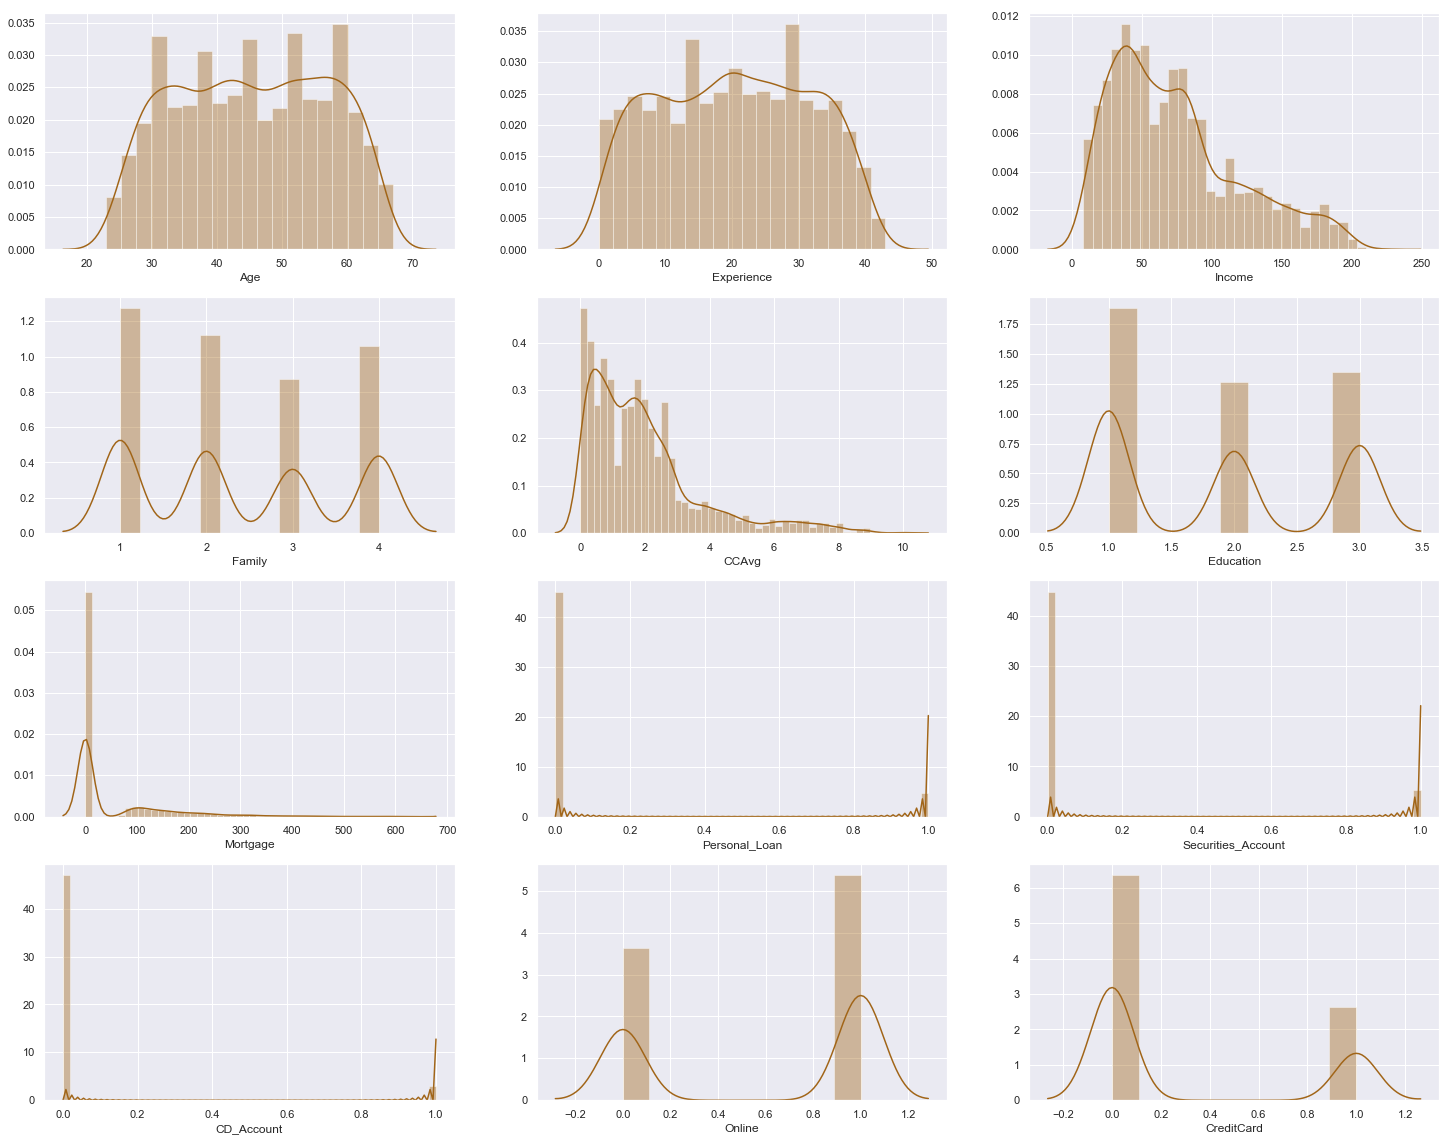

In [ ]:
f, axes = plt.subplots(4,3,figsize=(25, 20), sharex=False)
# Age
sns.distplot(df['Age'], ax=axes[0,0])
# Experience
sns.distplot(df['Experience'], ax=axes[0,1])
# Income
sns.distplot(df['Income'], ax=axes[0,2])
# Family
sns.distplot(df['Family'], ax=axes[1,0])
# CCAvg
sns.distplot(df['CCAvg'], ax=axes[1,1])
# Education
sns.distplot(df['Education'], ax=axes[1,2])
# Mortgage
sns.distplot(df['Mortgage'], ax=axes[2,0])
# Personal Loan
sns.distplot(df['Personal_Loan'], ax=axes[2,1])
# Securities Account
sns.distplot(df['Securities_Account'], ax=axes[2,2])
# CD Account
sns.distplot(df['CD_Account'], ax=axes[3,0])
# Online
sns.distplot(df['Online'], ax=axes[3,1])
# CreditCard
sns.distplot(df['CreditCard'], ax=axes[3,2])

#### Count plot of categorical variables

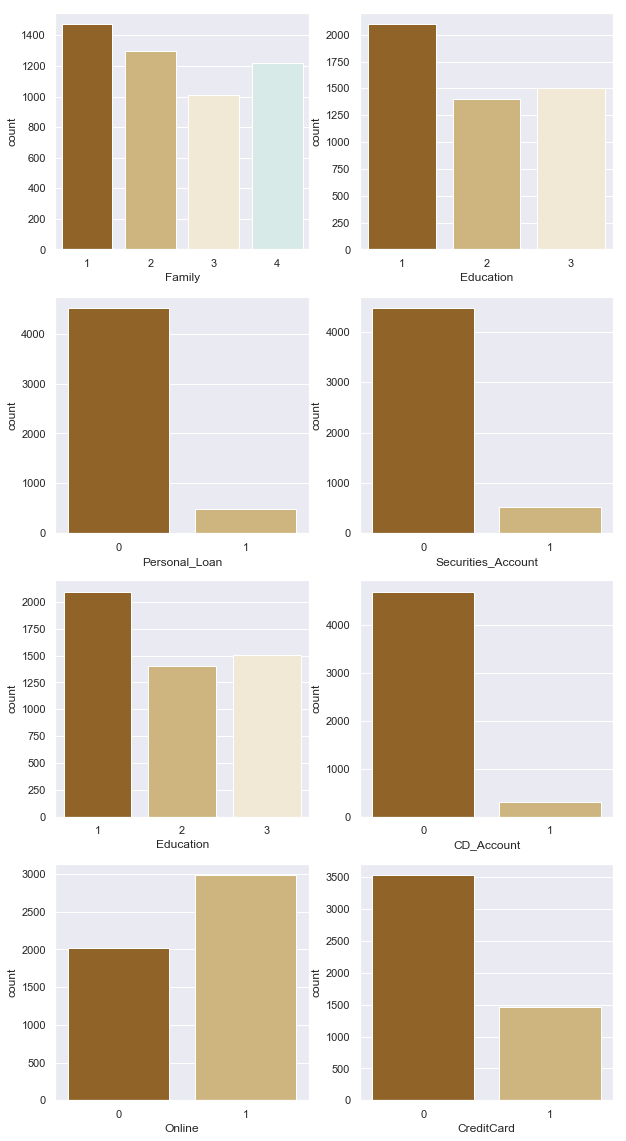

In [ ]:
f, axes = plt.subplots(4,2,figsize=(10, 20), sharex=False)

sns.countplot(x = 'Family', data = df, ax=axes[0,0])

sns.countplot(x = 'Education', data = df, ax=axes[0,1])

sns.countplot(x = 'Personal_Loan', data = df, ax=axes[1,0])

sns.countplot(x = 'Securities_Account',  data = df, ax=axes[1,1])

sns.countplot(x = 'Education',  data = df, ax=axes[2,0])

sns.countplot(x = 'CD_Account',  data = df, ax=axes[2,1])

sns.countplot(x = 'Online',  data = df, ax=axes[3,0])

sns.countplot(x = 'CreditCard',  data = df, ax=axes[3,1])

#### Pair plot for all variables

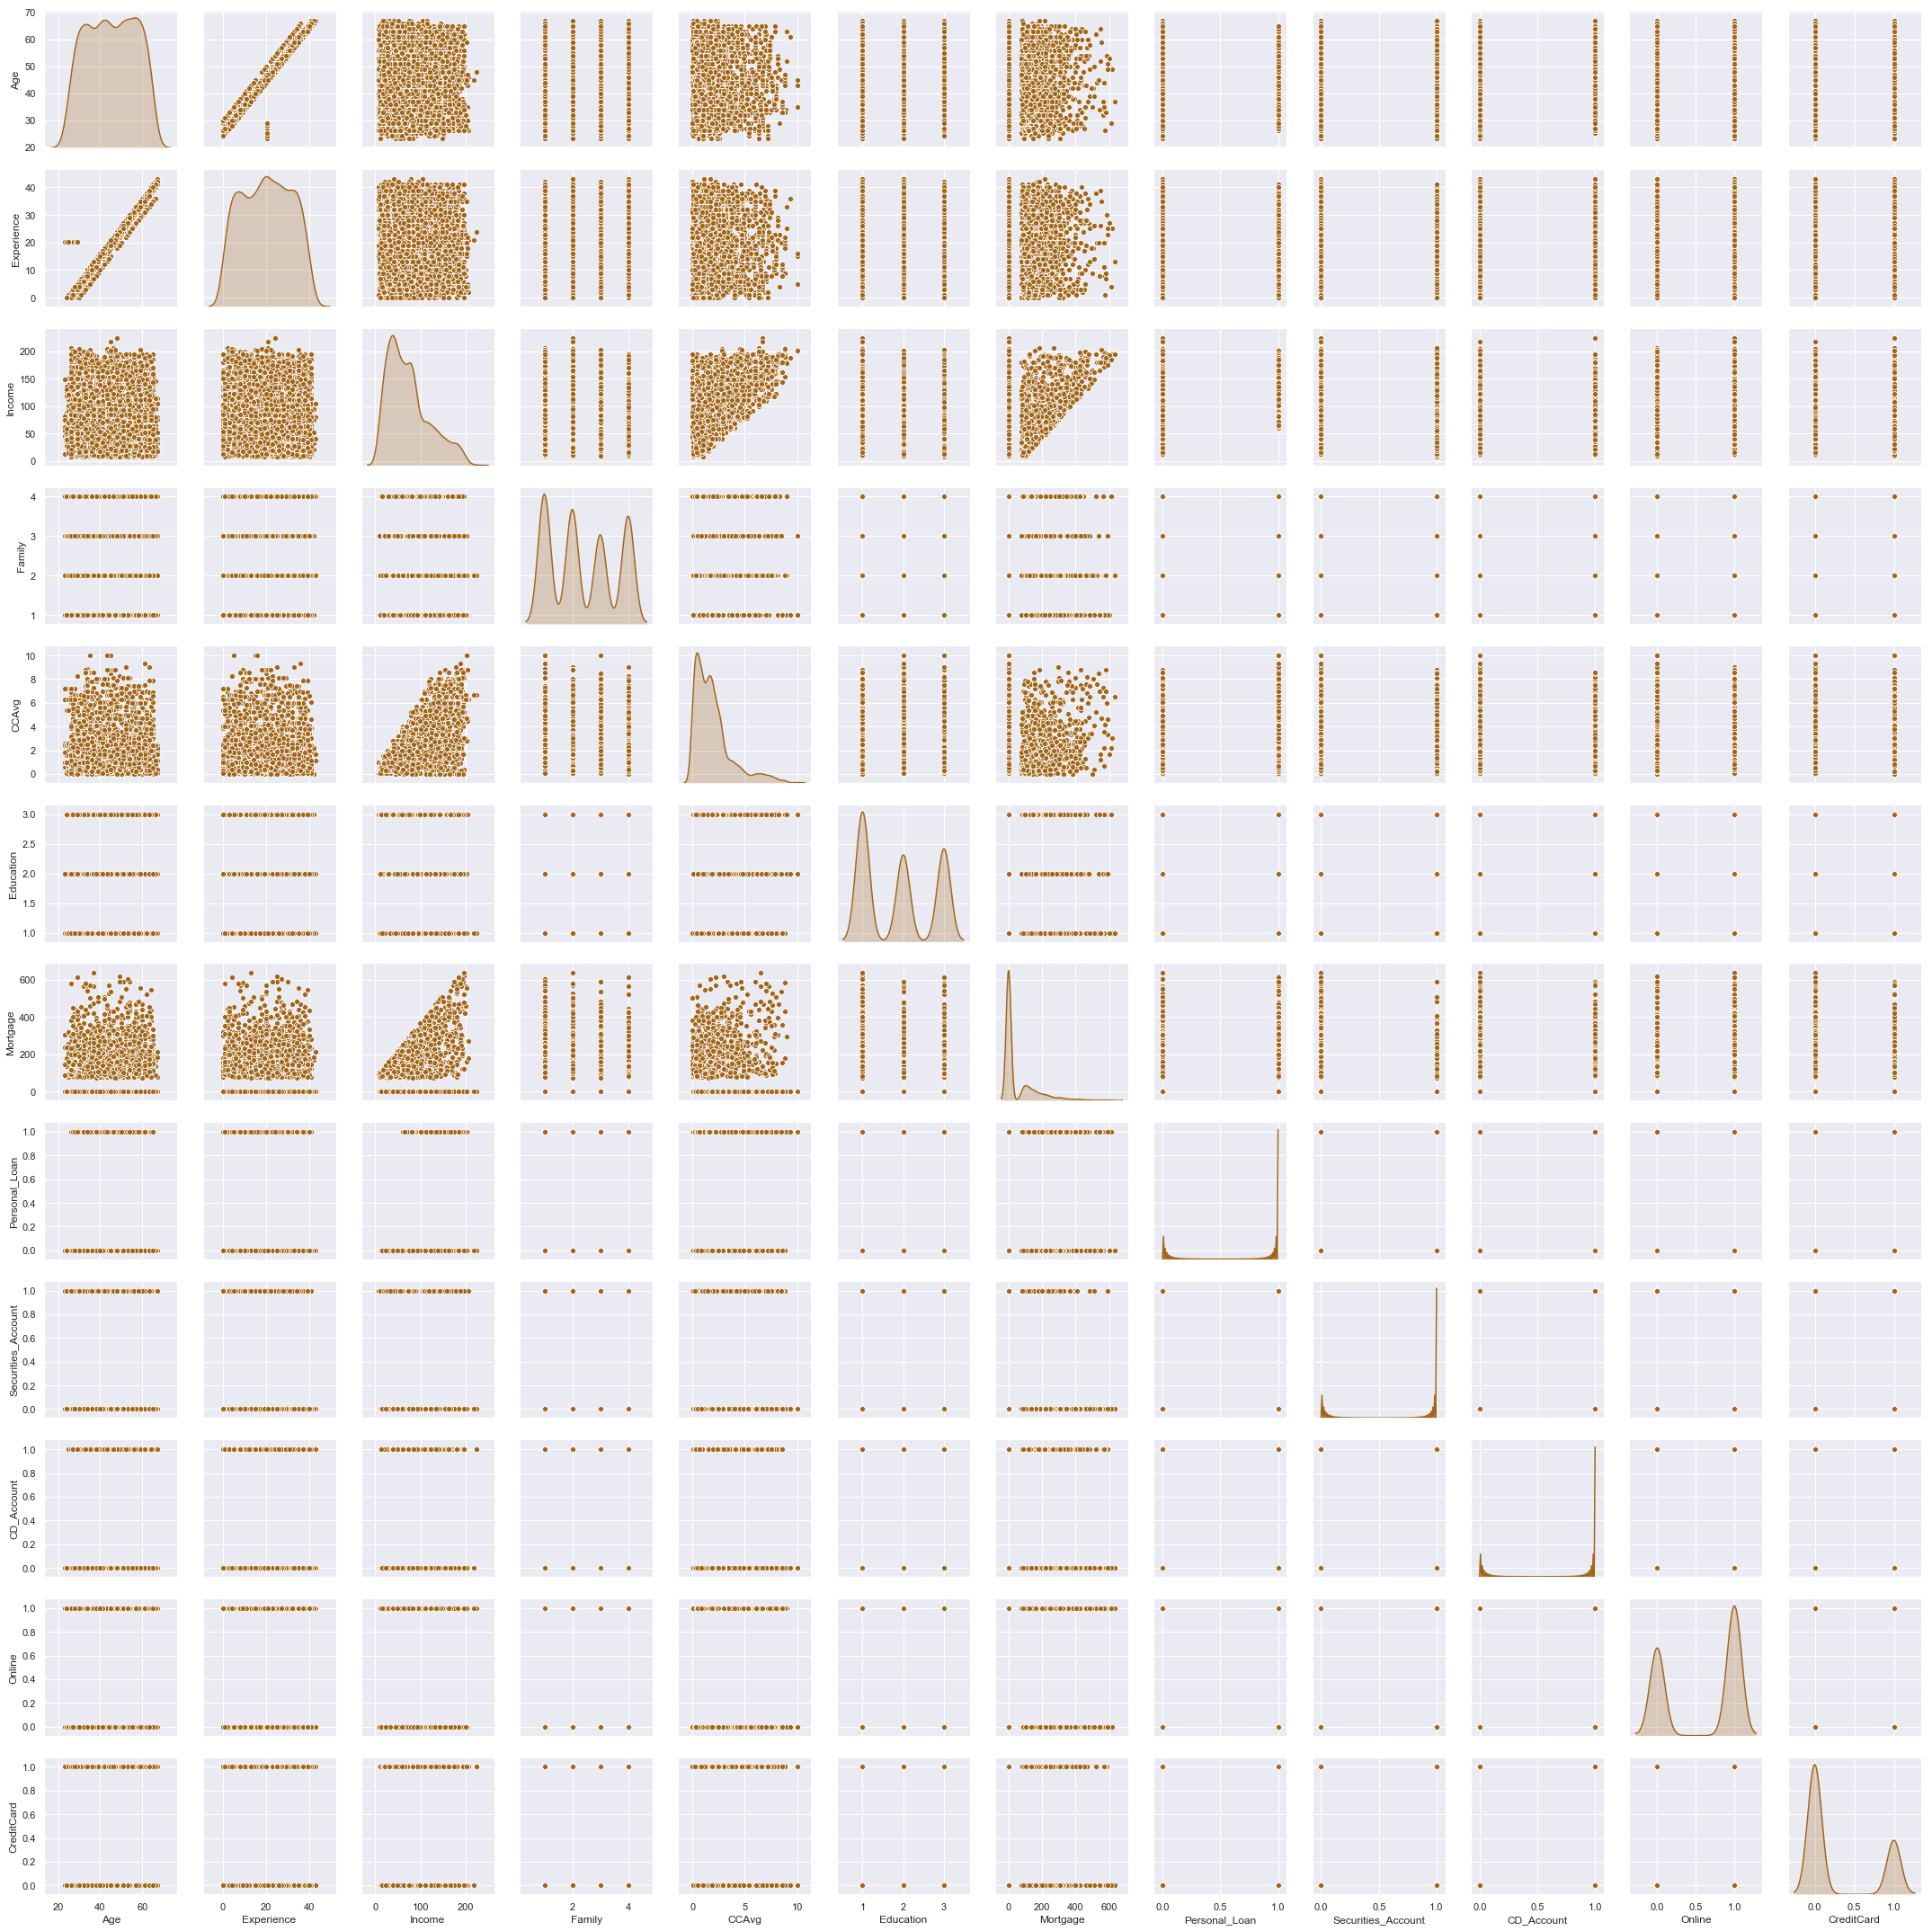

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.show()

# 🅰️ 3. Get the target column distribution. Your comments

#### Cont plot and distribution of target column 

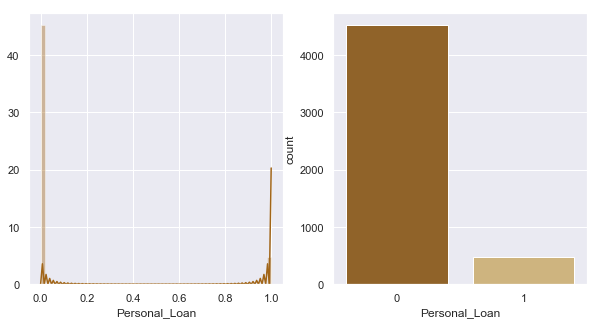

In [ ]:
f, axes = plt.subplots(1,2,figsize=(10, 5), sharex=False)
# Count plot 
sns.countplot(x = 'Personal_Loan', data = df, ax=axes[1])

# Distribution
sns.distplot(df['Personal_Loan'], ax=axes[0])

#### Depth vs width analysis

In [ ]:
df.groupby(["Personal_Loan"]).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
Personal_Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


# 🅰️ 4. Split the data into training and test set in the ratio of 70:30 respectively

#### Put predictor columns in X and target column in y

In [ ]:
# Select all rows and all predictor variables
X = df[["Age", "Experience","Income","Family","CCAvg","Education",
           "Mortgage","Securities_Account","CD_Account","Online","CreditCard"]]

# Select all rows and target variable
y = df["Personal_Loan"] 

#### Set traning and test ratio

In [ ]:
# taking 70:30 training and test set ratio - to vertically split the dataframe in 70:30 ratio.
test_size = 0.30 

# Random numbmer seeding for reapeatability of the code
seed =127

#### Split the data into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# 🅰️ 5.[a] Logistic regression model to predict the likelihood of a liability customer buying personal loans

#### Building Logistoc regression model

In [ ]:
# Instatiating the model
model_LR = LogisticRegression(solver='newton-cg')

# Training the model. The hyper surface is created here.
model_LR.fit(X_train, y_train)

# To simply capture the columns to show the co-efficiaents of model for each predictor variable
t = list(X_train.columns)

# Printing co-efficients and intercept of linear model
coef_df = pd.DataFrame(model_LR.coef_, columns= t)
coef_df['intercept_lr'] = model_LR.intercept_
print(coef_df)

        Age  Experience    Income    Family     CCAvg  Education  Mortgage  \
0  0.067914   -0.059567  0.052766  0.680977  0.115781   1.627587  0.000085   

   Securities_Account  CD_Account    Online  CreditCard  intercept_lr  
0           -0.754756    3.295054 -0.493283   -0.954799    -14.824824  


#### Testing the model

In [ ]:
# Pedicting the labels using above model. Array y_predict_LR contains the predicted labels
y_predict_LR = model_LR.predict(X_test)

In [ ]:
model_score_LR = model_LR.score(X_test, y_test)
print("Model Score is:\n",model_score_LR)

Model Score is:
 0.9493333333333334


# 🅰️ 6.[a] Print the confusion matrix for 'Logistic regression model'

In [ ]:
confusion_matrix_LR = metrics.confusion_matrix(y_test, y_predict_LR)
print("\nConfusion Matrix of 'Logistic regression model' is:\n",confusion_matrix_LR)


Confusion Matrix of 'Logistic regression model' is:
 [[1346   16]
 [  60   78]]


#### Analyzing the confusion matrix

#### Summarize the fit of the model

In [ ]:
summary_LR = metrics.classification_report(y_test, y_predict_LR)
print(summary_LR)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1362
           1       0.83      0.57      0.67       138

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.95      0.95      0.94      1500



# 🅰️ 5.[b] k-NN model to predict the likelihood of a liability customer buying personal loans

#### Building k-NN model

In [ ]:
# Instatiating the model
model_kNN = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )

# Training the model.
model_kNN.fit(X_train, y_train)

# Printing the model
model_kNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='distance')

#### Testing the k-NN model

In [ ]:
# Pedicting the labels using above model. Array y_predict_NB contains the predicted labels
y_predicted_kNN = model_kNN.predict(X_test)
expected = y_test

In [ ]:
model_score_kNN = model_kNN.score(X_test, y_test)
print("k-NN Model Score is:\n",model_score_kNN)

k-NN Model Score is:
 0.92


# 🅰️ 6.[b] Print the confusion matrix for 'k-NN model'

In [ ]:
confusion_matrix_kNN = metrics.confusion_matrix(y_test, y_predicted_kNN)
print("\nConfusion Matrix of 'k-NN model' is:\n",confusion_matrix_kNN)


Confusion Matrix of 'k-NN model' is:
 [[1330   32]
 [  88   50]]


#### summarize the fit of the model

In [ ]:
summary_kNN = metrics.classification_report(expected, y_predicted_kNN)
print(summary_kNN)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1362
           1       0.61      0.36      0.45       138

   micro avg       0.92      0.92      0.92      1500
   macro avg       0.77      0.67      0.71      1500
weighted avg       0.91      0.92      0.91      1500



# 🅰️ 5.[c] Naïve Bayes model to predict the likelihood of a liability customer buying personal loans

#### Building Naive Bayes model

In [ ]:
# Instatiating the model
model_NB = GaussianNB()

# Training the model.
model_NB.fit(X_train, y_train)

# Printing the model
model_NB

GaussianNB(priors=None, var_smoothing=1e-09)

#### Testing the Naïve Bayes model

In [ ]:
# Pedicting the labels using above model. Array y_predict_NB contains the predicted labels
y_predicted_NB = model_NB.predict(X_test)
expected = y_test

In [ ]:
model_score_NB = model_NB.score(X_test, y_test)
print("Naïve Bayes Model Score is:\n",model_score_NB)

Naïve Bayes Model Score is:
 0.894


# 🅰️ 6.[c] Print the confusion matrix for 'Naïve Bayes model'

In [ ]:
confusion_matrix_NB = metrics.confusion_matrix(expected, y_predicted_NB)
print("\nConfusion Matrix of 'Naïve Bayes model' is:\n",confusion_matrix_NB)


Confusion Matrix of 'Naïve Bayes model' is:
 [[1263   99]
 [  60   78]]


#### summarize the fit of the model

In [ ]:
summary_NB = metrics.classification_report(expected, y_predicted_NB)
print(summary_NB)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1362
           1       0.44      0.57      0.50       138

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.70      0.75      0.72      1500
weighted avg       0.91      0.89      0.90      1500



# 🅰️ 7. Give your reasoning on which is the best model in this case and why it performs better?

#### Comparing the scores and summaries of the models:

In [ ]:
model_score_LR = model_LR.score(X_test, y_test)
print("1. Logistic regression Model Score is:\n",model_score_LR)
model_score_kNN = model_kNN.score(X_test, y_test)
print("\n2. k-NN Model Score is:\n",model_score_kNN)
model_score_NB = model_NB.score(X_test, y_test)
print("\n3. Naïve Bayes Model Score is:\n",model_score_NB)


print("\na. Summary of fit of 'Logistic regression model':\n",summary_LR)

print("\nb. Summary of fit of 'k-NN model':\n",summary_kNN)

print("\nc. Summary of fit of 'Naïve Bayes model':\n",summary_NB)

1. Logistic regression Model Score is:
 0.9493333333333334

2. k-NN Model Score is:
 0.92

3. Naïve Bayes Model Score is:
 0.894

a. Summary of fit of 'Logistic regression model':
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1362
           1       0.83      0.57      0.67       138

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.89      0.78      0.82      1500
weighted avg       0.95      0.95      0.94      1500


b. Summary of fit of 'k-NN model':
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1362
           1       0.61      0.36      0.45       138

   micro avg       0.92      0.92      0.92      1500
   macro avg       0.77      0.67      0.71      1500
weighted avg       0.91      0.92      0.91      1500


c. Summary of fit of 'Naïve Bayes model':
               precision    recall  f1-score   support

           0       0.95    